[29500. 22500. 18000.]


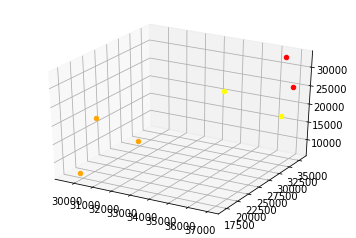

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
# 标准化数据集 X
from xlsxwriter import worksheet


def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)


# 计算一个样本与数据集中所有样本的欧氏距离的平方
def euclidean_distance(one_sample, X):
    one_sample = one_sample.reshape(1, -1)
    X = X.reshape(X.shape[0], -1)
    distances = np.power(np.tile(one_sample, (X.shape[0], 1)) - X, 2).sum(axis=1)
    return distances


class Kmeans():
    """Kmeans聚类算法.
    Parameters:
    -----------
    k: int
        聚类的数目.
    max_iterations: int
        最大迭代次数.
    varepsilon: float
        判断是否收敛, 如果上一次的所有k个聚类中心与本次的所有k个聚类中心的差都小于varepsilon,
        则说明算法已经收敛
    """

    def __init__(self, k=3, max_iterations=1000, varepsilon=0.001):
        self.k = k
        self.max_iterations = max_iterations
        self.varepsilon = varepsilon

    # 从所有样本中随机选取self.k样本作为初始的聚类中心
    def init_random_centroids(self, X):
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    # 返回距离该样本最近的一个中心索引[0, self.k)
    def _closest_centroid(self, sample, centroids):
        distances = euclidean_distance(sample, centroids)
        closest_i = np.argmin(distances)
        return closest_i

    # 将所有样本进行归类，归类规则就是将该样本归类到与其最近的中心
    def create_clusters(self, centroids, X):
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    # 对中心进行更新
    def update_centroids(self, clusters, X):
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    # 将所有样本进行归类，其所在的类别的索引就是其类别标签
    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    # 对整个数据集X进行Kmeans聚类，返回其聚类的标签
    def predict(self, X):
        # 从所有样本中随机选取self.k样本作为初始的聚类中心
        centroids = self.init_random_centroids(X)

        # 迭代，直到算法收敛(上一次的聚类中心和这一次的聚类中心几乎重合)或者达到最大迭代次数
        for _ in range(self.max_iterations):
            # 将所有进行归类，归类规则就是将该样本归类到与其最近的中心
            clusters = self.create_clusters(centroids, X)
            former_centroids = centroids

            # 计算新的聚类中心
            centroids = self.update_centroids(clusters, X)

            # 如果聚类中心几乎没有变化，说明算法已经收敛，退出迭代
            diff = centroids - former_centroids
            if diff.any() < self.varepsilon:
                break

        return self.get_cluster_labels(clusters, X)

data = []
# 读取数据
# 待计算样本数据的文件名称是means-input.xls,与python代码放在同一个目录下
wk = pd.read_excel(r'C:/Users/YangTeng/Desktop/工作文档/包装问题/HCR/代码测试.xlsx')
# Excel sheet页取名为sheet1
sheets = pd.read_excel(r'C:/Users/YangTeng/Desktop/工作文档/包装问题/HCR/代码测试.xlsx',sheet_name='Sheet1')

ws = sheets.values.tolist()
# 获取总行数

for i in range(0, len(ws)):

    row = ws[i][0]
    row1 = ws[i][1]
    row2 = ws[i][2]
    data.append([ float(row)*100, float(row1)*100, float(row2)*100])



min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
A = np.array(data)
print(A[0])
X=min_max_scaler.fit_transform(A)
num, dim = X.shape
clf = Kmeans(k=3)
y_pred = clf.predict(X)

color = ['red', 'orange','yellow']
ax = plt.subplot(111, projection='3d')
# kmeans计算结果保存的文件名means-output.csv;输出图像资源需用户自定义命名
f = open(r'C:/Users/YangTeng/Desktop/工作文档/包装问题/HCR/三维聚类测试结果.xlsx', 'w', encoding='utf-8', newline='')
csv_writer = csv.writer(f)

for p in range(0,num):
    y=y_pred[p]
    csv_writer.writerow([y])
    ax.scatter((A[p, 0]), (A[p, 1]), (A[p, 2]), c=color[(int(y))])
f.close()
plt.show()